In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [115]:
#, usecols=['lon','lat','tmpf','dwpf','relh','sknt','vsby']
df=pd.read_csv('idaho_weather_2020.csv')

Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'pm1i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_ti0e', 'feel', 'metar'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 11 to 9067
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   station            728 non-null    object        
 1   valid              728 non-null    datetime64[ns]
 2   lon                728 non-null    float64       
 3   lat                728 non-null    float64       
 4   tmpf               728 non-null    float32       
 5   dwpf               728 non-null    float32       
 6   relh               728 non-null    float32       
 7   drct

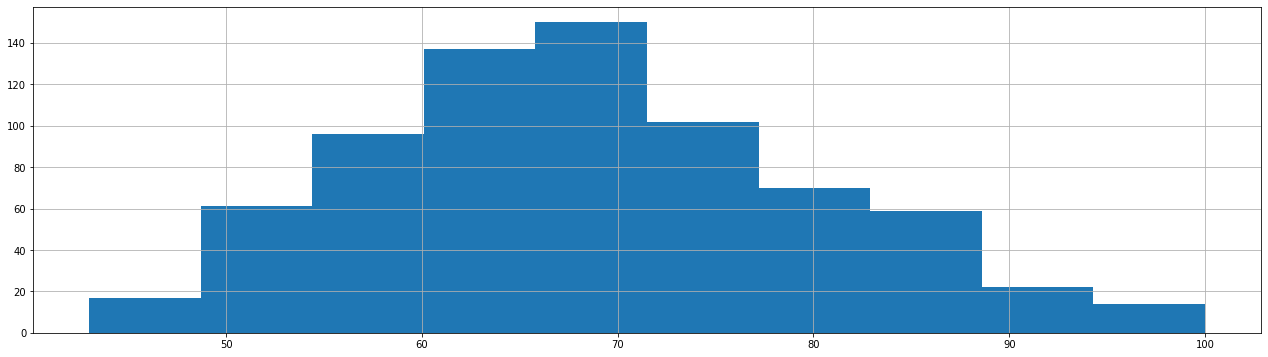

In [116]:
df=df[df['tmpf']!=0]
#print(df.head())
#datetime.strptime(str(x),'%m-%d-%Y')
df['valid']=df['valid'].apply(lambda x: pd.to_datetime(x)) 
df['tmpf']=pd.to_numeric(df['tmpf'],downcast='float') #temperature 
df['relh']=pd.to_numeric(df['relh'],downcast='float')
df['dwpf']=pd.to_numeric(df['dwpf'],downcast='float')
df['sknt']=pd.to_numeric(df['sknt'],downcast='float')
df['vsby']=pd.to_numeric(df['vsby'],downcast='float')

#dict={'tmpf':'tempFahrenheit','relh':'relativeHumidity','dwpf':'dewPoint','sknt':'knotsWindSpeed','vsby':'milesVisibility'}
#df=df.rename(columns=dict, inplace = True)


print(df.columns)
print(df.info())
plt.figure(figsize=(22,6))
df['tmpf'].hist(bins=10)
plt.show()


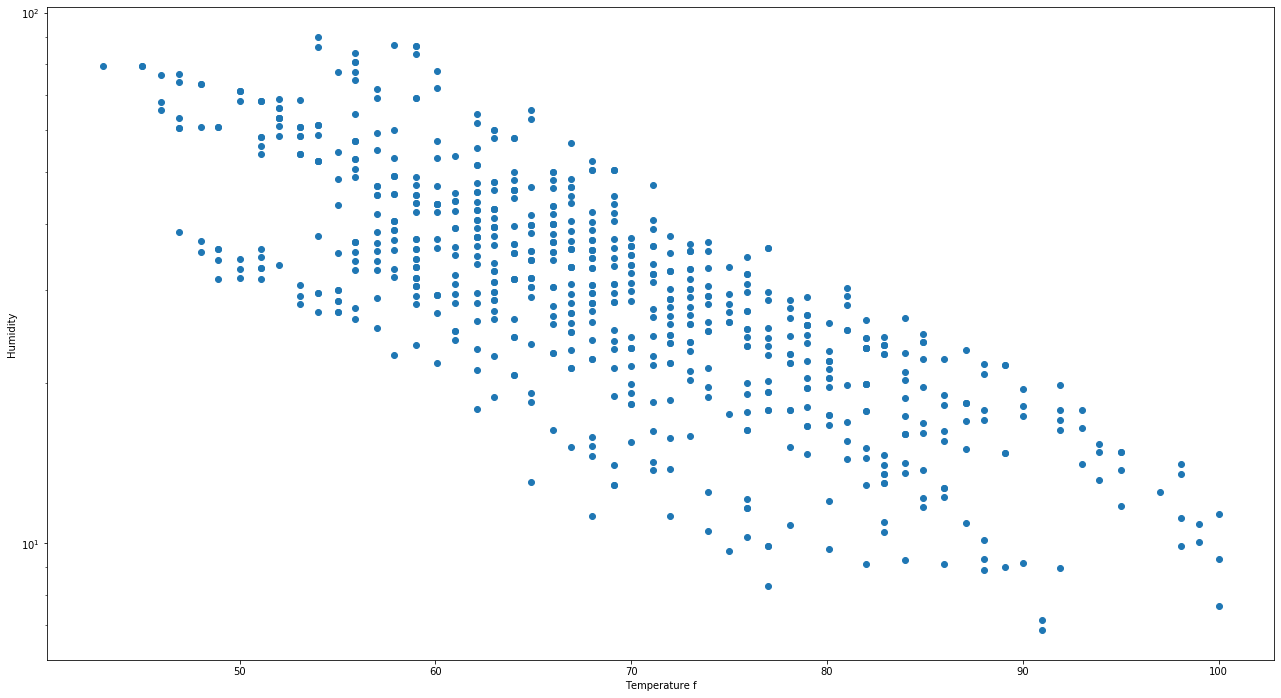

In [117]:
#plt.figure(figsize=(22,42))

df = df.sort_values('tmpf', ascending = True).reset_index(drop=True)

fig = plt.figure(figsize=(22,12))
ax = plt.gca()

ax.scatter(x='tmpf',y='relh',data=df)
plt.xlabel("Temperature f")
ax.set_yscale('log')
plt.ylabel("Humidity")
plt.show()

             tmpf        relh
count  728.000000  728.000000
mean    68.519646   33.228172
std     11.465651   16.183388
min     43.000000    6.860000
25%     60.099998   21.867499
50%     66.900002   30.460000
75%     75.900002   40.430000
max    100.000000   89.879997


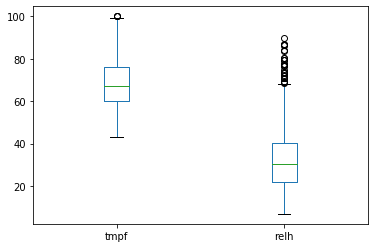

In [118]:
print(df[['tmpf','relh']].describe())

df[['tmpf','relh']].plot(kind='box')
plt.show()

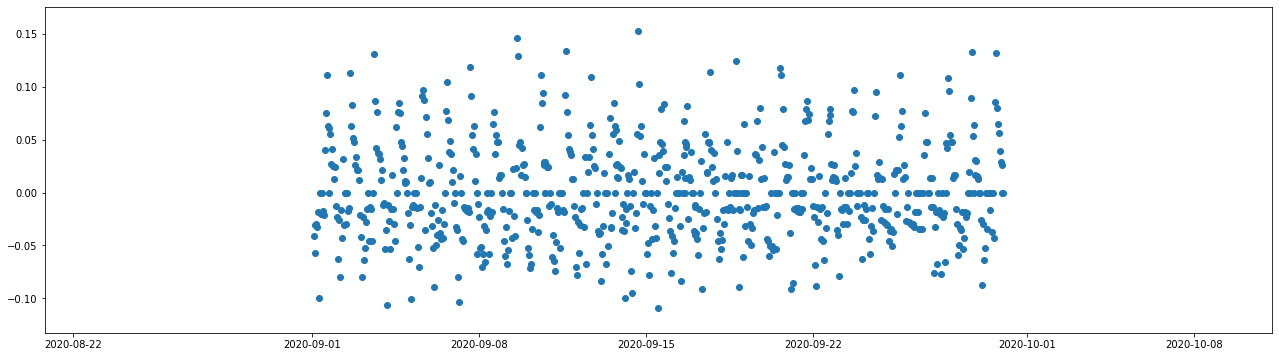

In [135]:
df['tmpf_chg']=df['tmpf'].pct_change()

df = df.sort_values('valid', ascending = True).reset_index(drop=True)
#for key,row in df.iterrows():
#    print(row['valid'],row['tmpf_chg'])

fig = plt.figure(figsize=(22,6))
plt.scatter(x='valid',y='tmpf_chg',data=df)
plt.show()

#g = sns.factorplot(data=df x='valid', y='tmpf_chg', 
#                  hue='vsby',  kind='point',size=8,aspect=2)
#plt.show()


Changes in wind speed and Temperature


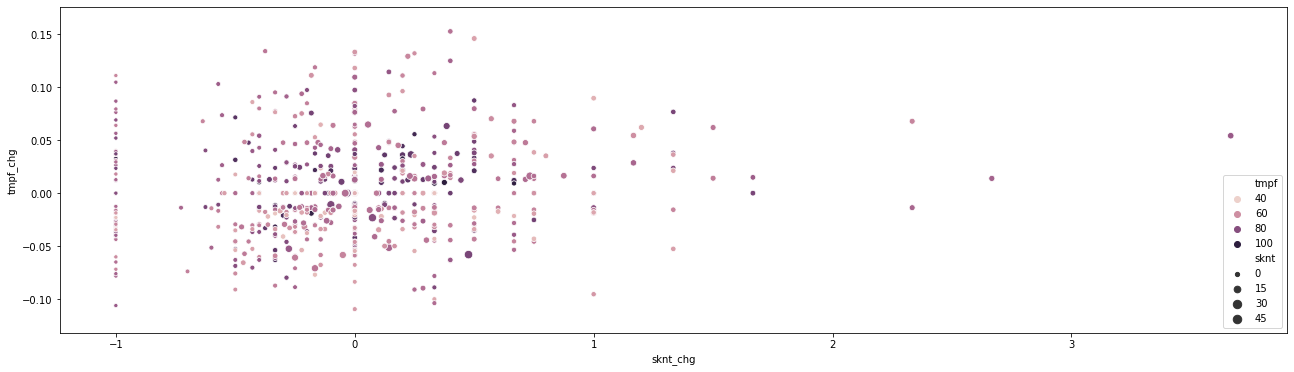

Wind speed by Temperature


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\colors.py:973: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


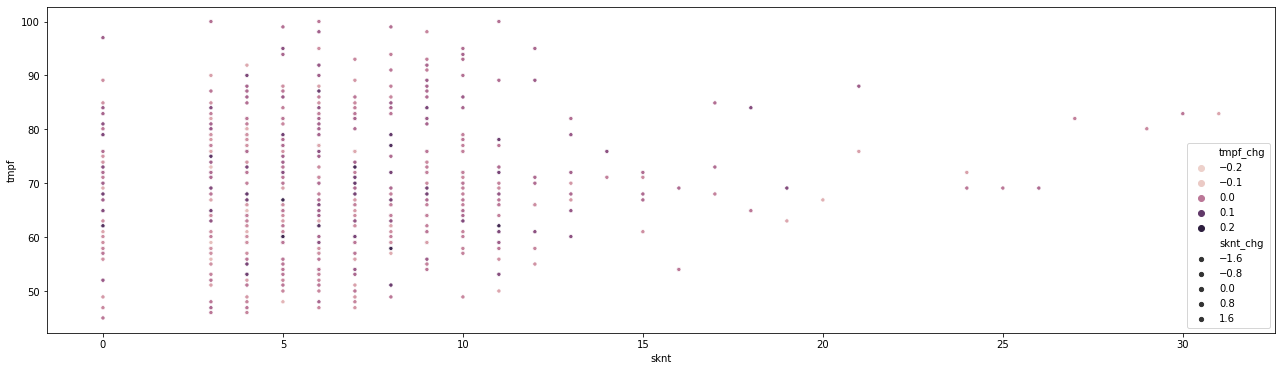

In [149]:
df['sknt_chg']=df['sknt'].pct_change()

df = df.sort_values('valid', ascending = True).reset_index(drop=True)
#for key,row in df.iterrows():
#    print(row['valid'],row['tmpf_chg'])

print("Changes in wind speed and Temperature")
fig = plt.figure(figsize=(22,6))
sns.scatterplot(x='sknt_chg',y='tmpf_chg', size='sknt', hue='tmpf', data=df)
plt.show()

print("Wind speed by Temperature")
fig = plt.figure(figsize=(22,6))
sns.scatterplot(x='sknt',y='tmpf', size='sknt_chg', hue='tmpf_chg', data=df)
plt.show()

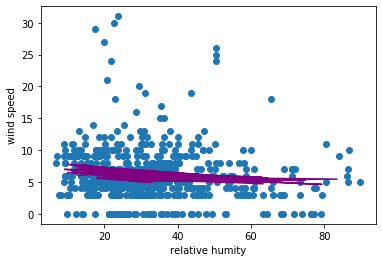

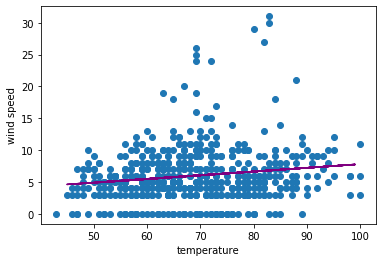

                            OLS Regression Results                            
Dep. Variable:                   sknt   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.269
Date:                Thu, 01 Oct 2020   Prob (F-statistic):            0.00200
Time:                        16:04:05   Log-Likelihood:                -2085.8
No. Observations:                 728   AIC:                             4178.
Df Residuals:                     725   BIC:                             4191.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4740      1.761      3.109      0.0

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

reg=LinearRegression()

df = df.sort_values('tmpf', ascending = True).reset_index(drop=True)

X=df[['tmpf','relh']]
y=df['sknt']

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
reg.fit(X_train,y_train)

y_prediction=reg.predict(X_test)

plt.clf()
plt.scatter(X_train['relh'],y_train)
plt.plot(X_test['relh'],y_prediction, c="Purple")
plt.ylabel('wind speed')
plt.xlabel('relative humity')
plt.show()

plt.clf()
plt.scatter(X_train['tmpf'],y_train)
plt.plot(X_test['tmpf'],y_prediction, c="Purple")
plt.ylabel('wind speed')
plt.xlabel('temperature')
plt.show()


#https://datatofish.com/multiple-linear-regression-python/
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

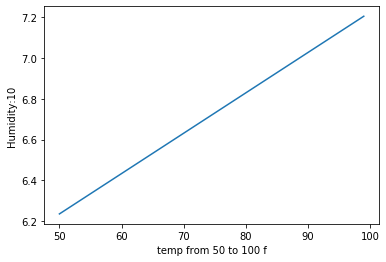

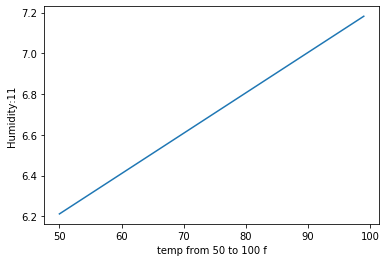

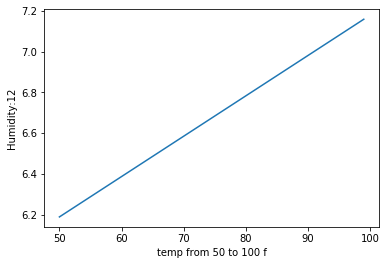

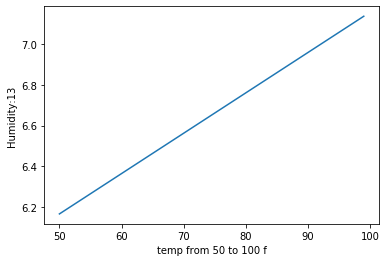

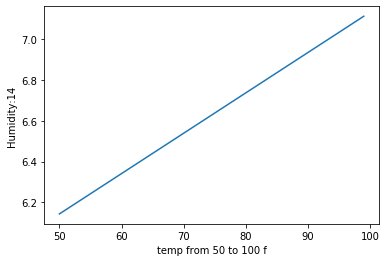

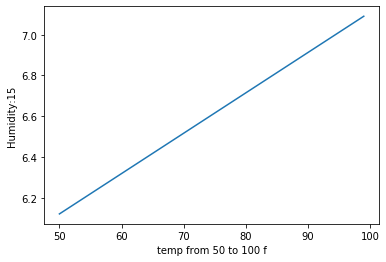

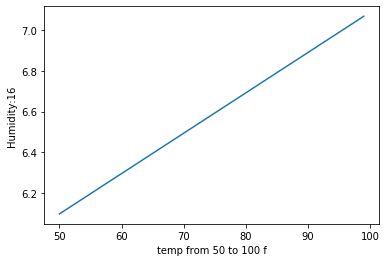

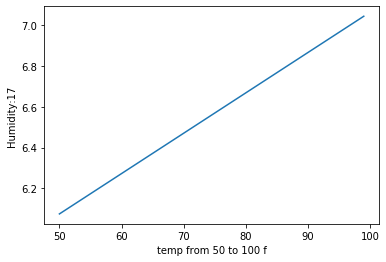

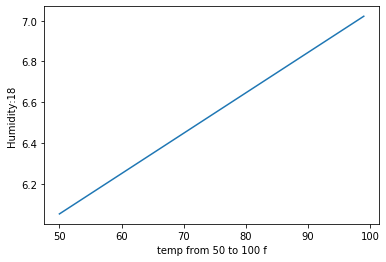

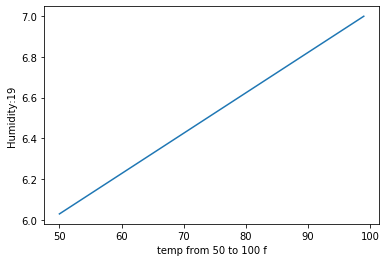

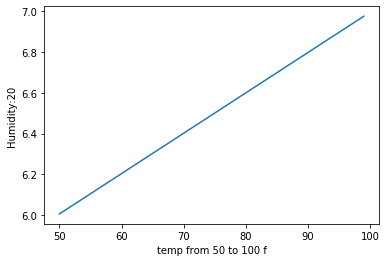

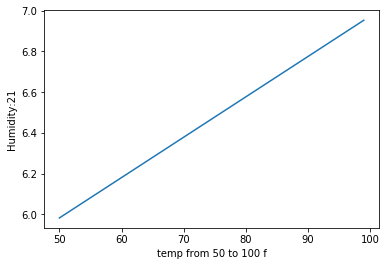

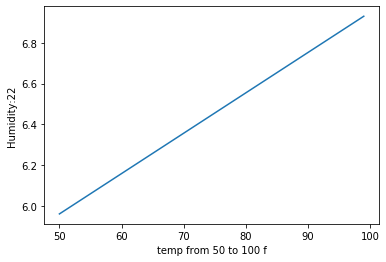

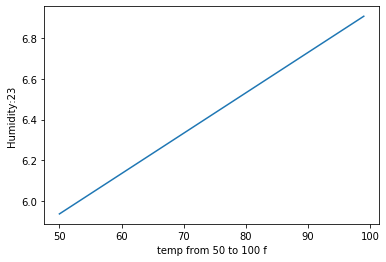

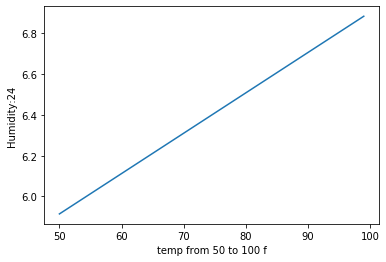

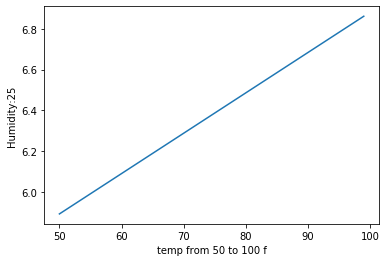

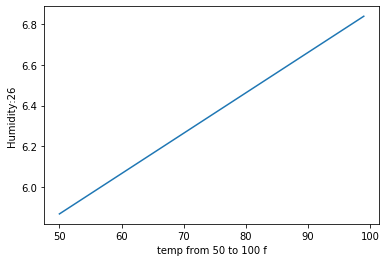

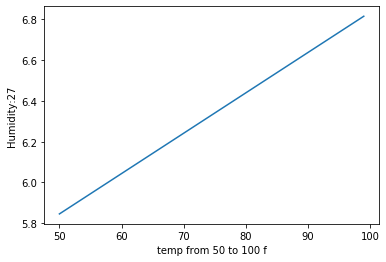

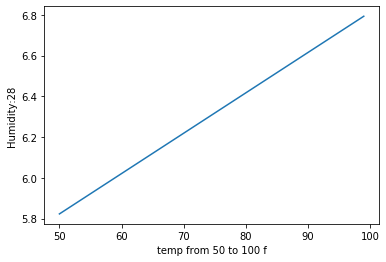

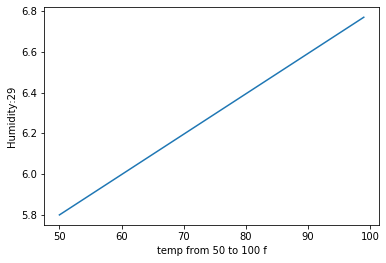

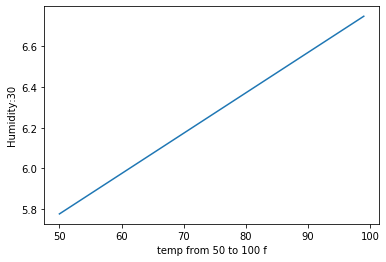

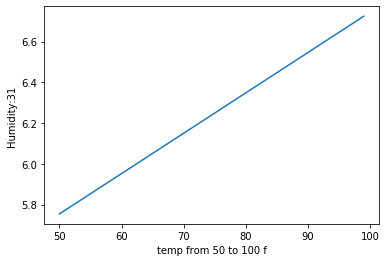

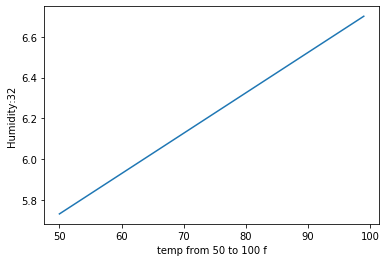

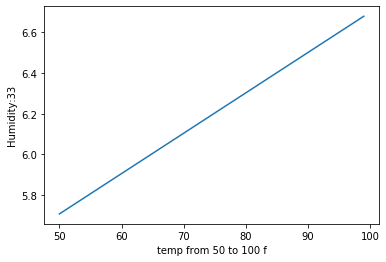

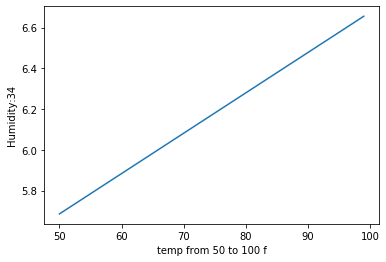

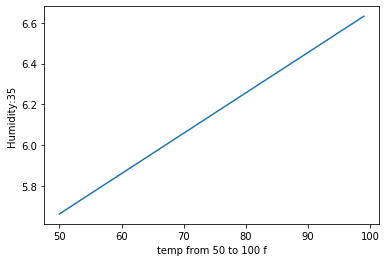

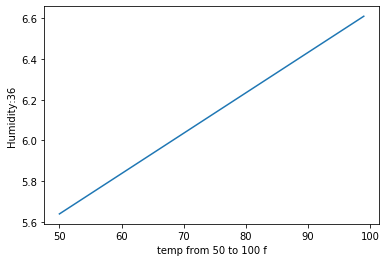

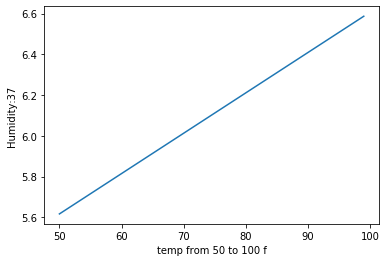

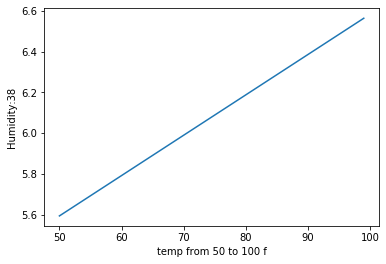

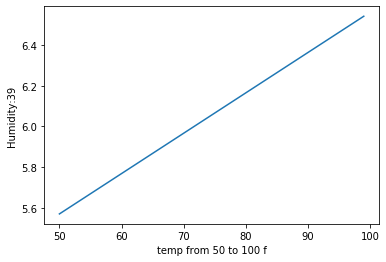

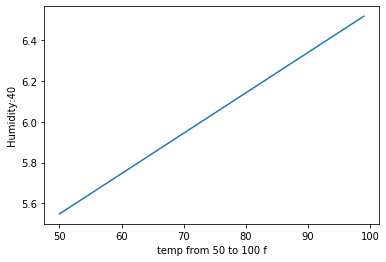

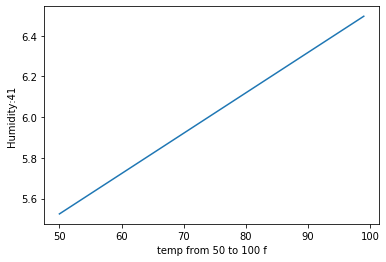

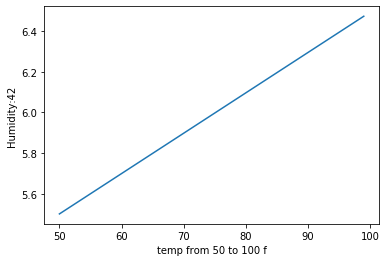

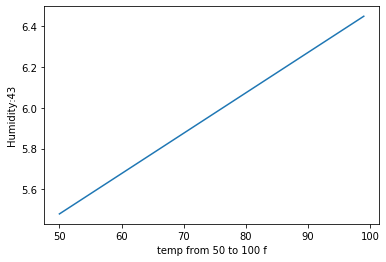

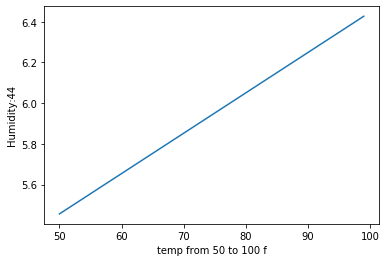

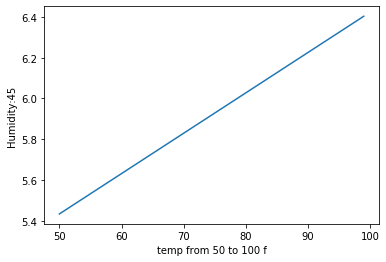

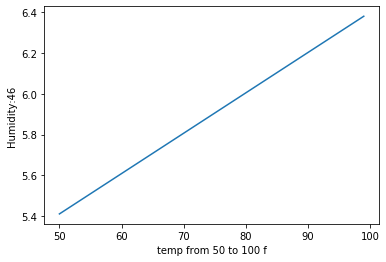

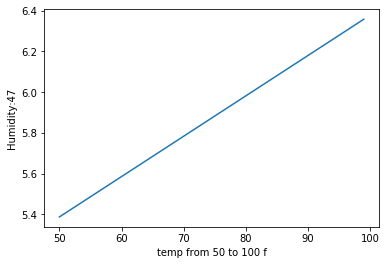

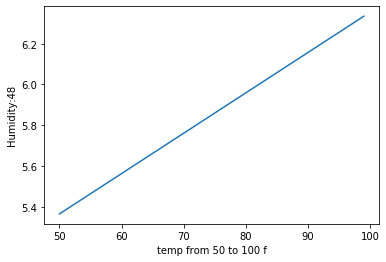

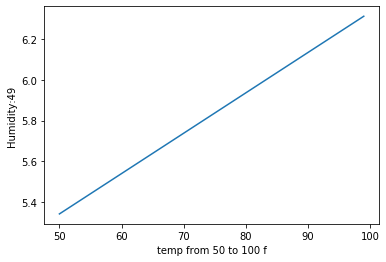

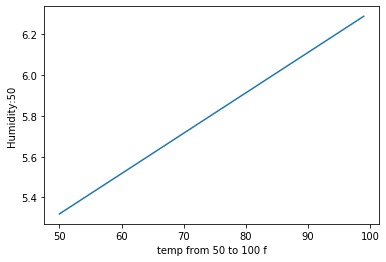

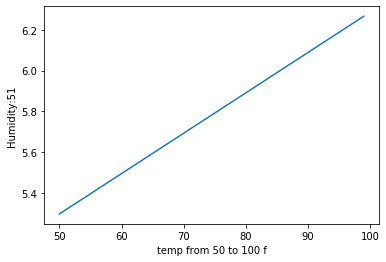

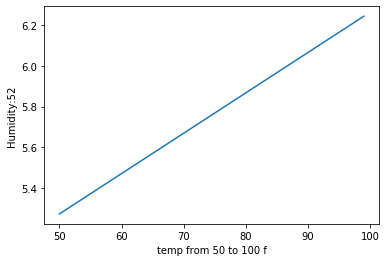

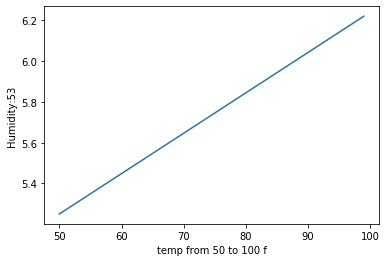

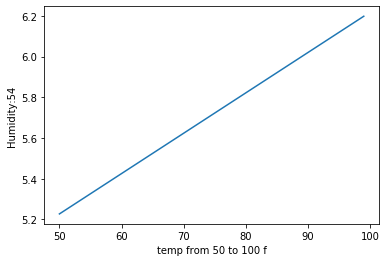

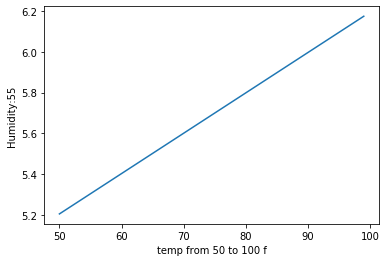

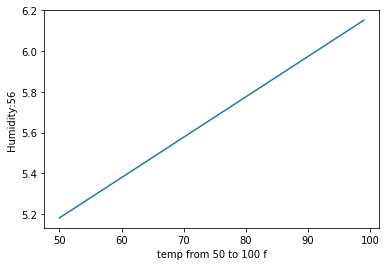

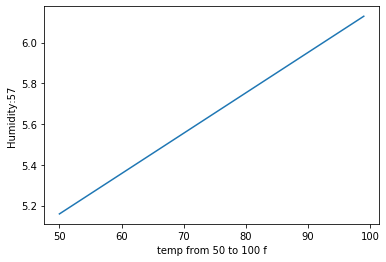

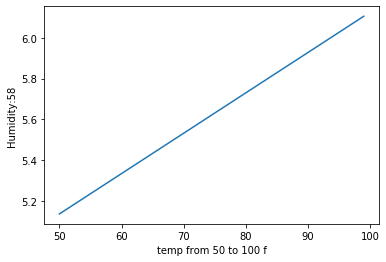

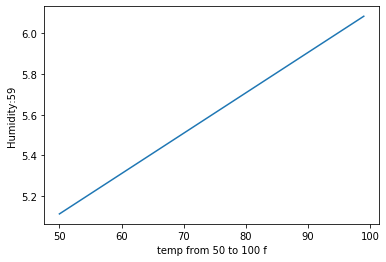

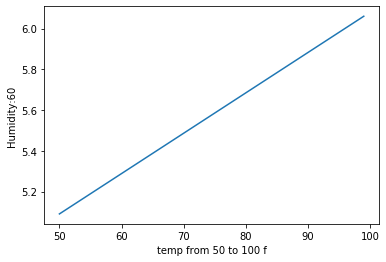

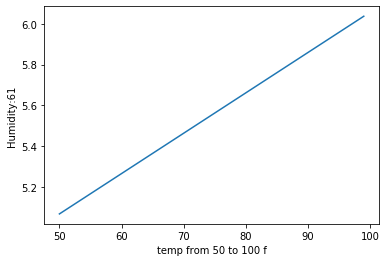

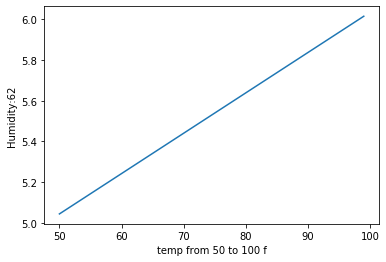

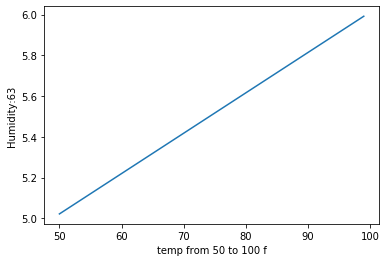

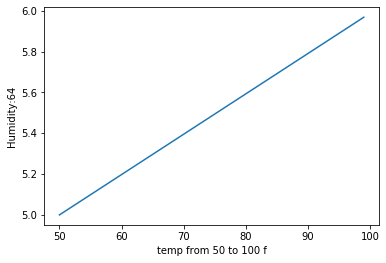

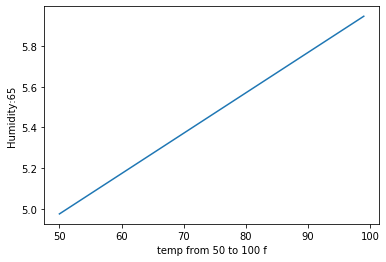

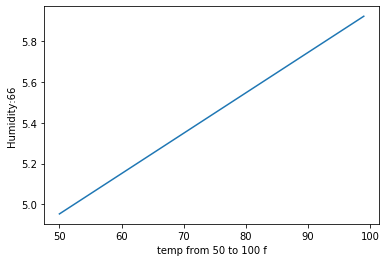

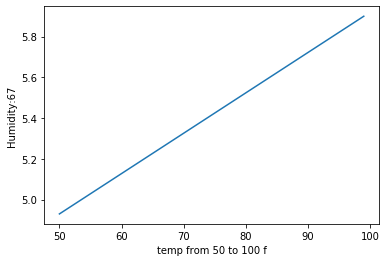

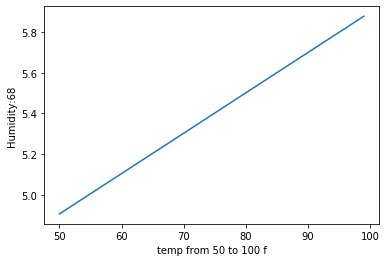

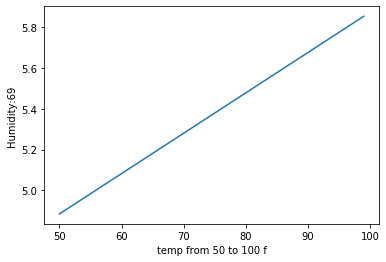

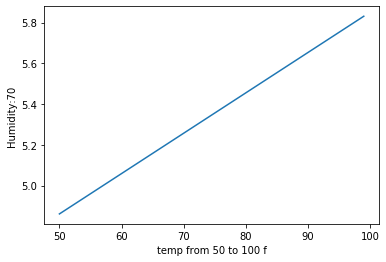

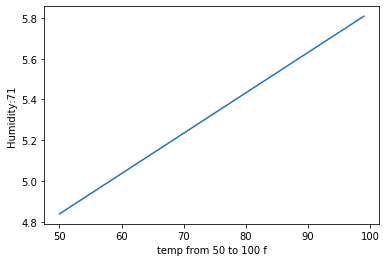

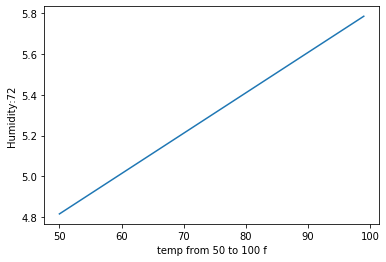

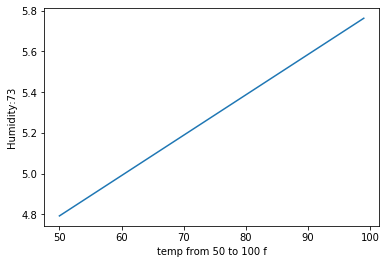

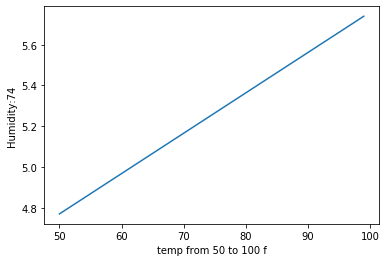

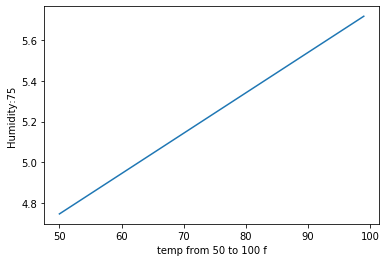

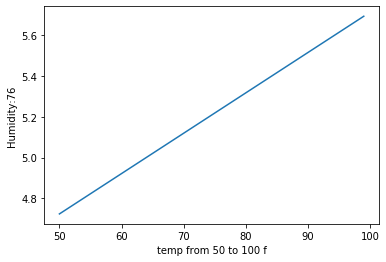

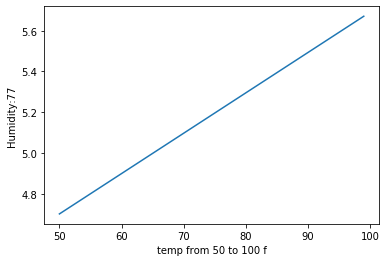

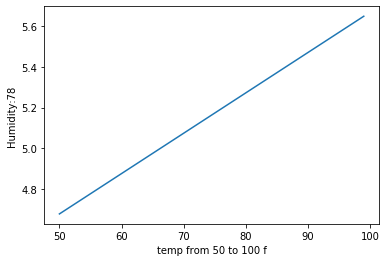

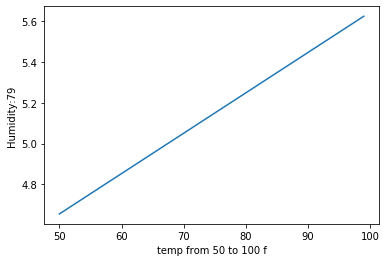

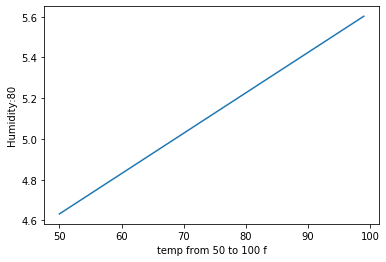

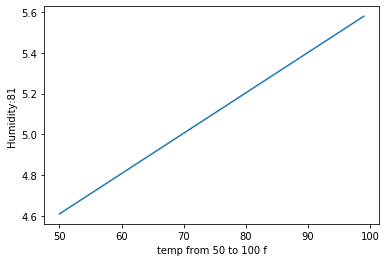

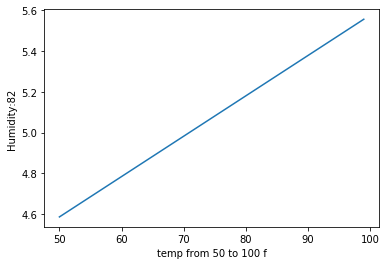

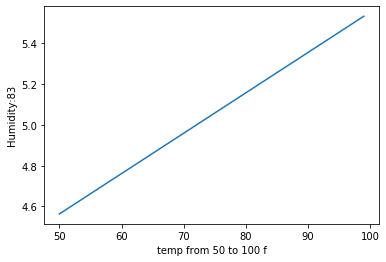

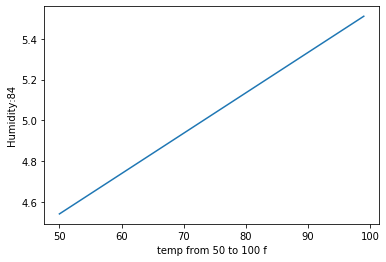

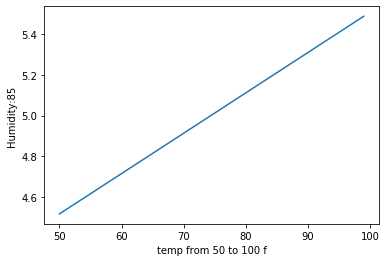

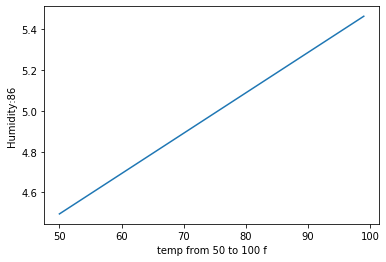

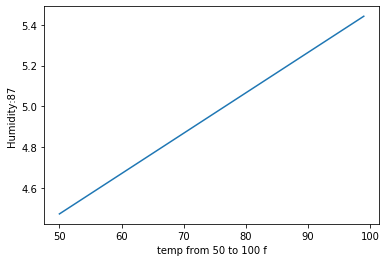

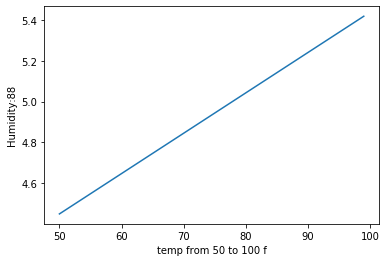

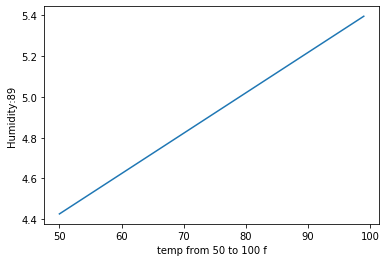

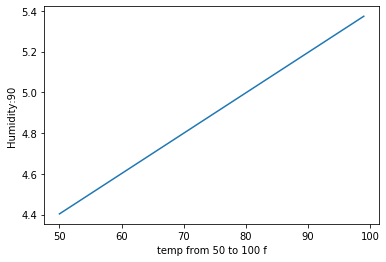

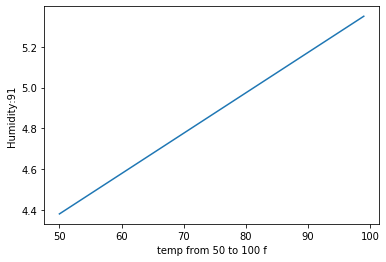

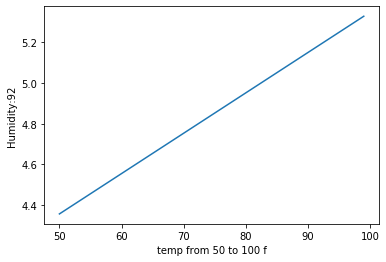

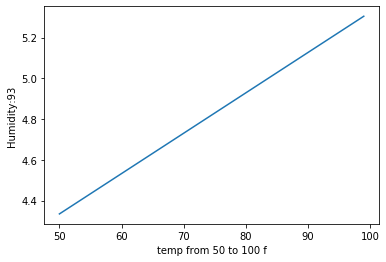

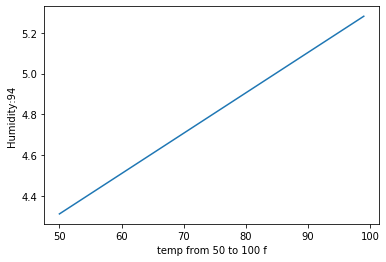

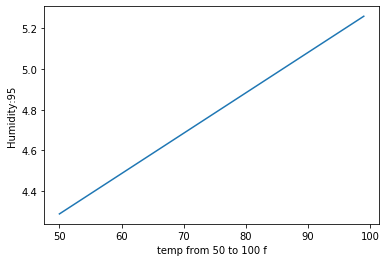

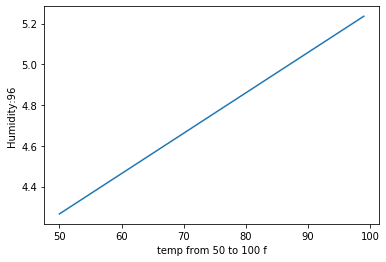

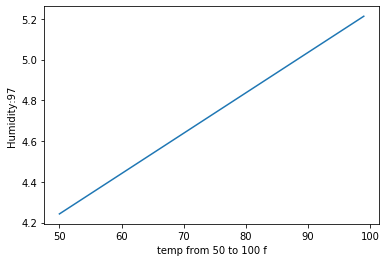

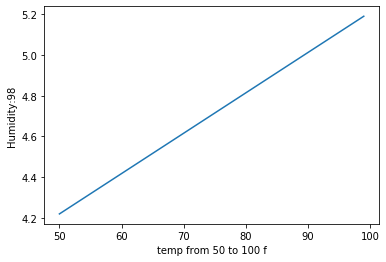

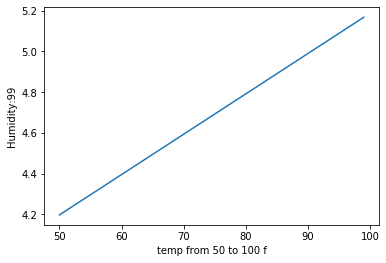

In [193]:

#humidity=10
wind_speed=[]
temperatures=[]
humidities=[]
for humidity in np.arange(10,100):
    for temperature in np.arange(50,100):
        wind_speed.append(5.4740 +(0.0198*temperature) + (-0.0229*humidity))
        temperatures.append(temperature)
        humidities.append(humidity)
    plt.plot(temperatures,np.array(wind_speed))
    plt.xlabel("temp from 50 to 100 f")
    plt.ylabel("Humidity:"+str(humidity))
    plt.show()
    wind_speed=[]
    temperatures=[]
    humidities=[]
    #print(result)